In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
df=pd.read_csv("C:/Users/BHANU PRASAD/OneDrive/Desktop/Data science/wine-clustering.csv")

In [296]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [298]:
df.shape

(178, 13)

In [299]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [300]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
scalar=StandardScaler()

In [303]:
scaled_df=scalar.fit_transform(df)

In [304]:
from sklearn.decomposition import PCA

In [305]:
pca=PCA(n_components=2)

In [306]:
reduced_df=pca.fit_transform(scaled_df)

In [307]:
from sklearn.cluster import KMeans


In [308]:
k_value=range(1,11)
wcss=[]

In [309]:
for k in k_value:
    km=KMeans(n_clusters=k)
    km.fit(reduced_df)
    wcss.append(km.inertia_)

In [310]:
wcss

[1282.1026695794817,
 629.3609307352824,
 260.0166626835765,
 193.1470309154342,
 155.1897928555472,
 147.5601449792975,
 99.24814548387029,
 89.91299130008187,
 84.97520450473274,
 73.1199191635934]

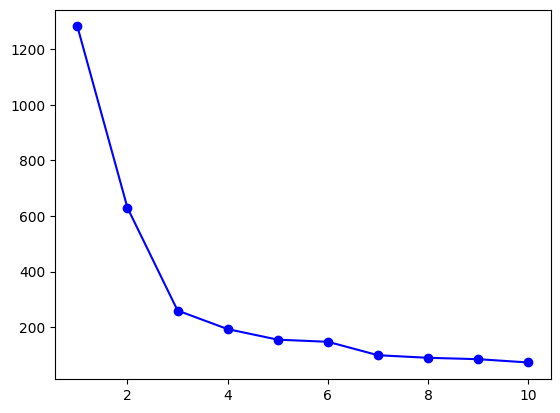

In [311]:
plt.plot(k_value,wcss,'bo-')

In [312]:
km=KMeans(n_clusters=3,random_state=42)

In [313]:
clusters=km.fit_predict(reduced_df)

In [314]:
reduced_df[clusters==0]

array([[ 1.5021945 , -0.76943201],
       [-0.92858197, -3.07348616],
       [-1.54248014, -1.38144351],
       [-1.83624976, -0.82998412],
       [ 0.03060683, -1.26278614],
       [ 2.05026161, -1.9250326 ],
       [-0.60968083, -1.90805881],
       [ 0.90022784, -0.76391147],
       [ 2.24850719, -1.88459248],
       [ 0.18338403, -2.42714611],
       [-0.81280503, -0.22051399],
       [ 1.9756205 , -1.40328323],
       [-1.57221622, -0.88498314],
       [ 1.65768181, -0.9567122 ],
       [-0.72537239, -1.0636454 ],
       [ 1.83256757, -1.2878782 ],
       [-0.8679929 , -2.44410119],
       [ 0.3700144 , -2.15390698],
       [-1.45737704, -1.38335177],
       [ 1.26293085, -0.77084953],
       [ 0.37615037, -1.0270434 ],
       [ 0.7620639 , -3.37505381],
       [ 1.03457797, -1.45070974],
       [-0.49487676, -2.38124353],
       [ 0.83532015, -1.47367055],
       [ 0.78790461, -2.02662652],
       [-0.80683216, -2.23383039],
       [-0.55804262, -2.37298543],
       [-1.11511104,

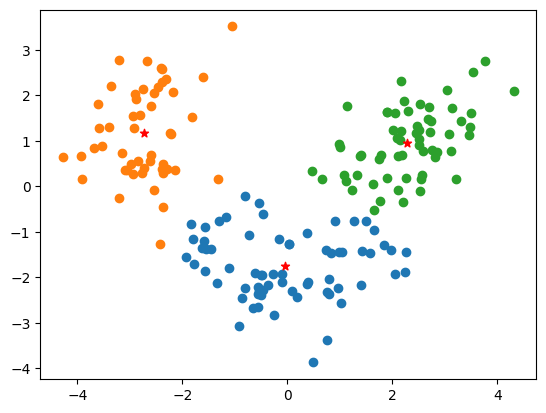

In [315]:
plt.scatter(reduced_df[clusters==0,0],reduced_df[clusters==0,1])
plt.scatter(reduced_df[clusters==1,0],reduced_df[clusters==1,1])
plt.scatter(reduced_df[clusters==2,0],reduced_df[clusters==2,1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r',marker='*')

In [316]:
from sklearn.metrics import silhouette_score
score=silhouette_score(reduced_df,clusters)

In [317]:
score

np.float64(0.5601697480957203)

In [318]:
from sklearn.metrics import silhouette_score

# Assuming 'reduced_df' is your feature matrix and 'clusters' is the array of cluster labels
score = silhouette_score(reduced_df, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5601697480957203
